In [1]:
%matplotlib inline
import numpy as np

import betterplotlib as bpl
bpl.set_style()

In [5]:
box_size = 60
center = box_size / 2.0

In [6]:
weights_r = np.zeros((box_size, box_size))
weights_r2 = np.zeros((box_size, box_size))

In [7]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [15]:
for x in range(box_size):
    for y in range(box_size):
        r = np.maximum(distance(x, y, center, center), 1.0)
        weights_r[y][x] = 1.0 / r
        weights_r2[y][x] = 1.0 / r**2

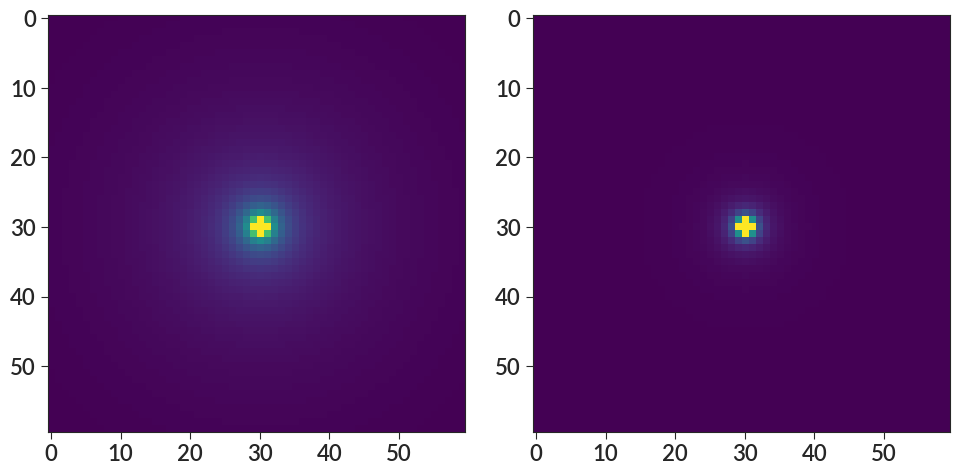

In [19]:
fig, axs = bpl.subplots(ncols=2)
axs[0].imshow(weights_r)
axs[1].imshow(weights_r2)

# Integrate with distance, should be a flat line

In [21]:
def create_cumulative_radial_profile(image):
    radii, ys = [], []
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):

            radii.append(distance(x, y, center, center))
            ys.append(image[y, x])

    # sort everything in order of radii
    idxs = np.argsort(radii)
    return np.array(radii)[idxs], np.cumsum(np.array(ys)[idxs])

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


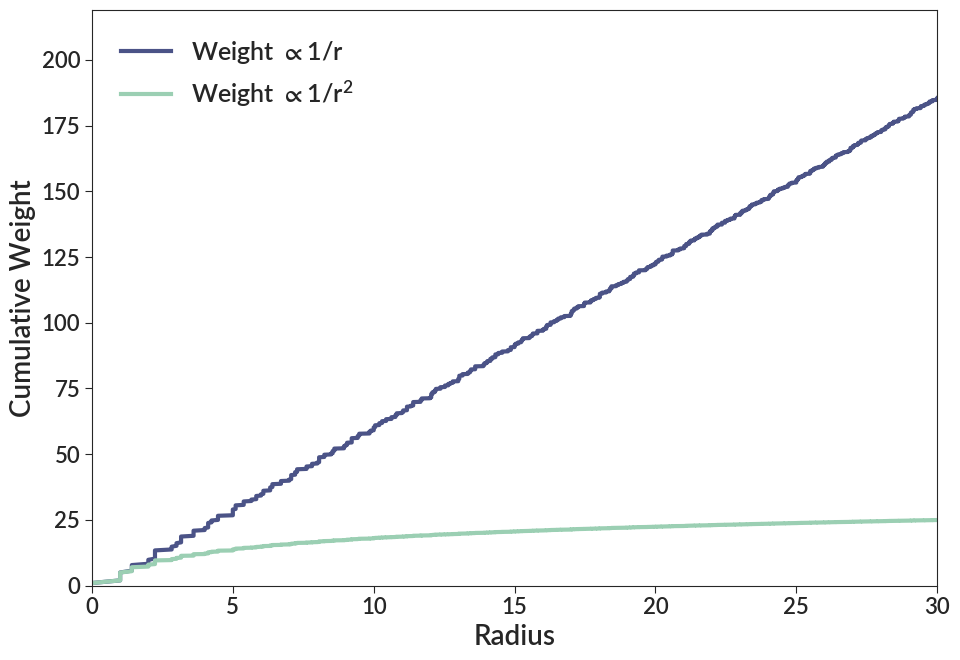

In [65]:
fig, ax = bpl.subplots()
ax.plot(*create_cumulative_radial_profile(weights_r), label="Weight $\propto 1/r$")
ax.plot(*create_cumulative_radial_profile(weights_r2), label="Weight $\propto 1/r^2$")
ax.legend()
ax.set_limits(0, 30, 0)
ax.add_labels("Radius", "Cumulative Weight")

# Calculate the sum of the weights in different annuli

In [58]:
def annuli_sum(image, bin_size):
    xs = np.array(range(0, 30, bin_size))
    sums = {i:0 for i in xs}
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):

            r = distance(x, y, center, center)
            
            bin_value = np.max(xs[np.where(xs <= r)])
            if r < 30:
                sums[bin_value] += image[y][x]
    ys = [sums[x] for x in xs]
    # move the xs to be the bin centers
    return np.array(xs) + bin_size/2.0, np.array(ys)

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


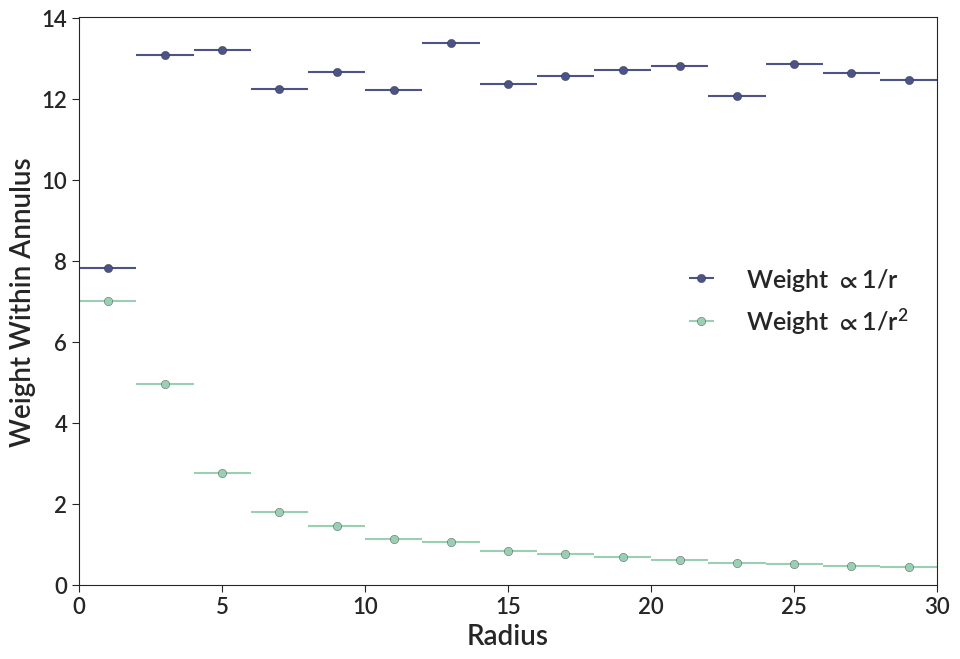

In [66]:
bin_size=2
fig, ax = bpl.subplots()
ax.errorbar(*annuli_sum(weights_r, bin_size), xerr=0.5*bin_size, label="Weight $\propto 1/r$")
ax.errorbar(*annuli_sum(weights_r2, bin_size), xerr=0.5*bin_size, label="Weight $\propto 1/r^2$")
ax.legend(loc=5)
ax.set_limits(0, 30, 0)
ax.add_labels("Radius", "Weight Within Annulus")